In [10]:
!pip install spacy_conll
!pip install spacy-stanza
!pip install spacy-udpipe

'\n!pip install spacy_conll\n!pip install spacy-stanza\n!pip install spacy-udpipe\n'

In [2]:
import pandas as pd
import spacy_conll
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from spacy_conll import init_parser

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [19]:
from tqdm import tqdm

In [8]:
dir_path = "drive/MyDrive/Thesis/"

In [4]:
scoring_labels = [
    "root",
    "conj",
    "parataxis",
    "csubj",
    "csubj:pass",
    "csubj:outer",
    "ccomp",
    "xcomp",
    "advcl",
    "acl",
    "relcl",
    "acl:rlcl",
    "Obl",
    "Obl:agent",
    "advmod",
    "mod",
    "nmod:poss",
    "amod",
    "nummod"
]

In [5]:
def get_score(df):
    labels = df.groupby(['deprel']).size()
    score = 0
    for label in scoring_labels:
        try:
            score += labels[label]
        except KeyError:
            pass
    return score

In [6]:
parser = init_parser("en", "stanza", parser_opts={"verbose": False})

In [22]:
with open(f"{dir_path}mc500.train.contexts.txt") as infile:
    num_lines = sum(1 for _ in infile)

In [25]:
complexity_scores = []
with open(f"{dir_path}mc500.train.contexts.txt") as infile:
    for line in tqdm(infile, total=num_lines):
        df = parser(line)._.conll_pd
        complexity_scores.append(get_score(df))

100%|██████████| 300/300 [38:21<00:00,  7.67s/it]


In [62]:
data = []
with open(f"{dir_path}mc500.train.contexts.txt") as infile:
    for score, line in zip(complexity_scores, infile):
        data.append([score, len(line), score/len(line), line])

In [63]:
df = pd.DataFrame(data, columns=["complexity_score", "char_len", "score_over_len", "context"])

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
counts, bins = np.histogram(df["complexity_score"], bins=30)

(array([ 1.,  5., 10., 17., 36., 46., 40., 17., 29., 25., 13., 13., 12.,
        11.,  8.,  5.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([ 28.        ,  33.73333333,  39.46666667,  45.2       ,
         50.93333333,  56.66666667,  62.4       ,  68.13333333,
         73.86666667,  79.6       ,  85.33333333,  91.06666667,
         96.8       , 102.53333333, 108.26666667, 114.        ,
        119.73333333, 125.46666667, 131.2       , 136.93333333,
        142.66666667, 148.4       , 154.13333333, 159.86666667,
        165.6       , 171.33333333, 177.06666667, 182.8       ,
        188.53333333, 194.26666667, 200.        ]),
 <a list of 30 Patch objects>)

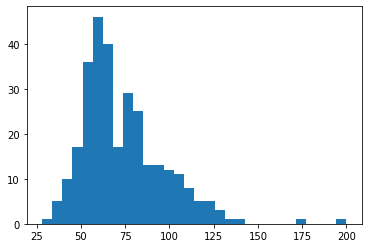

In [58]:
plt.hist(bins[:-1], bins, weights=counts)

(array([ 6.,  7., 37., 57., 33., 29., 19., 24., 20., 23., 16.,  7.,  9.,
         6.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 590.        ,  671.56666667,  753.13333333,  834.7       ,
         916.26666667,  997.83333333, 1079.4       , 1160.96666667,
        1242.53333333, 1324.1       , 1405.66666667, 1487.23333333,
        1568.8       , 1650.36666667, 1731.93333333, 1813.5       ,
        1895.06666667, 1976.63333333, 2058.2       , 2139.76666667,
        2221.33333333, 2302.9       , 2384.46666667, 2466.03333333,
        2547.6       , 2629.16666667, 2710.73333333, 2792.3       ,
        2873.86666667, 2955.43333333, 3037.        ]),
 <a list of 30 Patch objects>)

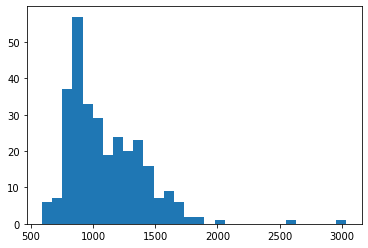

In [67]:
counts, bins = np.histogram(df["char_len"], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

(array([ 2.,  1.,  1.,  2.,  2.,  4.,  3.,  2.,  9., 14., 16., 15., 25.,
        17., 19., 19., 27., 26., 24., 15., 14., 11.,  9.,  5.,  8.,  3.,
         1.,  1.,  1.,  4.]),
 array([0.04402516, 0.04546807, 0.04691097, 0.04835388, 0.04979679,
        0.0512397 , 0.05268261, 0.05412552, 0.05556843, 0.05701133,
        0.05845424, 0.05989715, 0.06134006, 0.06278297, 0.06422588,
        0.06566879, 0.06711169, 0.0685546 , 0.06999751, 0.07144042,
        0.07288333, 0.07432624, 0.07576915, 0.07721205, 0.07865496,
        0.08009787, 0.08154078, 0.08298369, 0.0844266 , 0.08586951,
        0.08731241]),
 <a list of 30 Patch objects>)

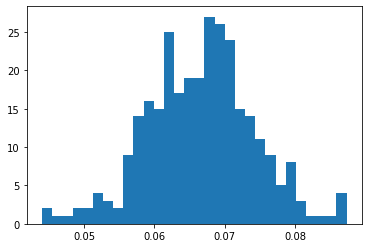

In [68]:
counts, bins = np.histogram(df["score_over_len"], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

In [64]:
df.describe()

,complexity_score,char_len,score_over_len
count,300.000000,300.000000,300.000000
mean,73.503333,1100.220000,0.066549
std,23.156079,308.332518,0.007587
min,28.000000,590.000000,0.044025
25%,57.000000,875.000000,0.061757
50%,68.000000,1030.500000,0.066821
75%,85.000000,1283.250000,0.071163
max,200.000000,3037.000000,0.087312


In [71]:
df[df["complexity_score"] == 28]

,complexity_score,char_len,score_over_len,context
27,28,636,0.044025,The booger on the balloon sailed far and wide....


In [70]:
df[df["complexity_score"] == 200]

,complexity_score,char_len,score_over_len,context
284,200,3037,0.065854,"Many, many years back, in a place full of magi..."


In [65]:
df

,complexity_score,char_len,score_over_len,context
0,51,901,0.056604,Alyssa got to the beach after a long trip. She...
1,66,850,0.077647,"One morning, Elena woke up, much like she did ..."
2,91,1394,0.065280,Billy was like a king on the school yard. A ki...
3,70,925,0.075676,Billy went to the farm to buy some beef for hi...
4,54,836,0.064593,The road to Grandpa's house was long and windi...
...,...,...,...,...
295,97,1524,0.063648,Larry the dinosaur was going to go to a dinosa...
296,59,1062,0.055556,James was getting ready for the weekend. He ne...
297,67,980,0.068367,Sarah looked up high. She could see the scisso...
298,83,1088,0.076287,Once there was a boy named Bill who liked to p...


In [66]:
df.to_csv(f"{dir_path}prompt_complexity_dataset.tsv", sep="\t")